# <center>Data Science Training</center>
<center><b>Feature Selection Template</b><br>
Feature selection methods. Unsupervised, Univariate, Model (Not exhaustive, domain knowledge plus round iterations)</center>

## Import packages

In [71]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

# import customized machine learning toolkit
from jllib import xval, feat_imp

from __future__ import division
#from __future__ import print_function

from sklearn.feature_selection import VarianceThreshold, SelectFromModel, SelectKBest, SelectPercentile, RFE, RFECV
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
from sklearn.model_selection import StratifiedKFold


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

## Define parameters

In [2]:
INPUT_PATH = 'C:\Users\liuleo\Documents\KT\Python_template\Classification\exa_dataset.csv' #"path saving your model building dataset"
FILE_SEP = '|' #"input file separator, pipe for example"
TARGET = 'm_target' #'name of the column for classification target'
ID = 'custid'#'row id (for example customer id)'
PRED_PROBA = 'm_target_proba'#'column name to store preidction score'

## Read model building file

In [3]:
df = pd.read_csv(INPUT_PATH, sep=FILE_SEP, na_values=["\N", "NULL"])

## Get feature columns

In [4]:
feature_id_columns = [x for x in df.columns if x != TARGET]
print "number of features to use {}".format(len(feature_id_columns)-1)

feature_columns = [x for x in df.columns if (x not in [TARGET, ID])]


number of features to use 99


In [5]:
print(TARGET)
print("Target Proportion {}".format(TARGET))
print(df[TARGET].sum())
print(df[TARGET].mean())

m_target
Target Proportion m_target
4395
0.220876469997


## Feature selection methods

In [6]:
df_features = df[feature_columns]
df_target = df[[TARGET]]

### Variance

Remove all features whose variance doesn’t meet some threshold <br>
Var[X] = p(1 - p)

In [7]:
sel = VarianceThreshold(0.81)
np_sel = sel.fit_transform(df_features)
labels = [df_features.columns[x] for x in sel.get_support(indices=True)]
df_sel = pd.DataFrame(np_sel, columns=labels)
print "Number of Initial Features {}".format(len(feature_columns))
print "Number of Selected Features {}".format(len(labels))

Number of Initial Features 99
Number of Selected Features 68


In [8]:
print 'Removed features {}'.format([x for x in feature_columns if x not in df_sel.columns.values])

Removed features ['v2', 'v5', 'v9', 'v11', 'v13', 'v14', 'v15', 'v16', 'v17', 'v19', 'v23', 'v25', 'v28', 'v29', 'v33', 'v34', 'v40', 'v41', 'v42', 'v47', 'v48', 'v53', 'v56', 'v57', 'v58', 'v61', 'v63', 'v73', 'v76', 'v88', 'v97']


In [9]:
# Add ID and Target after feature selection
df_sel = pd.concat([df[[ID,TARGET]], df_sel], axis=1)
sel_feature_id_columns = [x for x in df_sel.columns if x != TARGET]

### Xval after feature selection

modeling started
shuffle: 0, AUC: 0.808760, lift at 10 percent: 3.053030
shuffle: 1, AUC: 0.793728, lift at 10 percent: 3.011673
shuffle: 2, AUC: 0.810276, lift at 10 percent: 3.160742
shuffle: 3, AUC: 0.805873, lift at 10 percent: 3.011152
shuffle: 4, AUC: 0.803522, lift at 10 percent: 3.114880


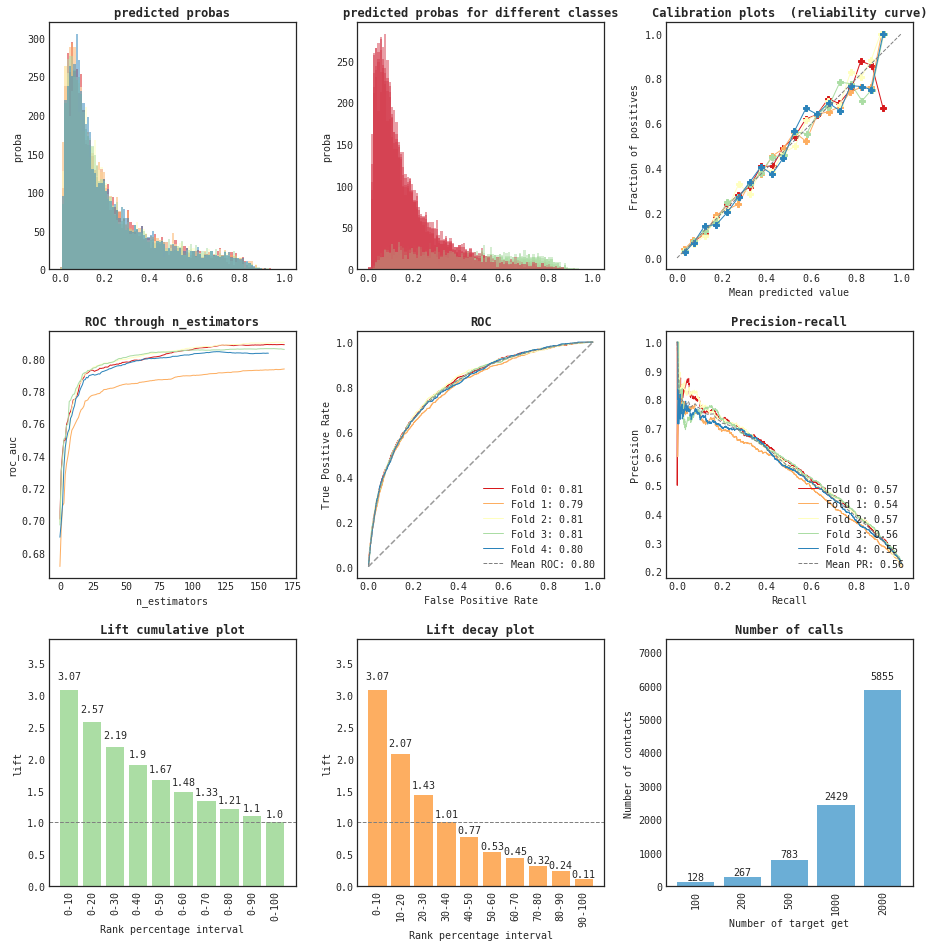

In [10]:
classifier = xgb.XGBClassifier(objective='binary:logistic',max_depth=6, n_estimators=170, learning_rate=0.05, max_delta_step=1,
                               min_child_weight=25, gamma=0.1, scale_pos_weight=1, colsample_bytree=0.85, subsample=0.85, 
                               colsample_bylevel=0.85, nthread=4, seed=27, silent=1)

results_cv_targeting, feature_importances, nb_calls_cv = xval.run_cross_validation_xgb(df_sel, classifier, sel_feature_id_columns,
                                                                                       ID, TARGET, PRED_PROBA, 5, .3, 0, False, 
                                                                                       40)

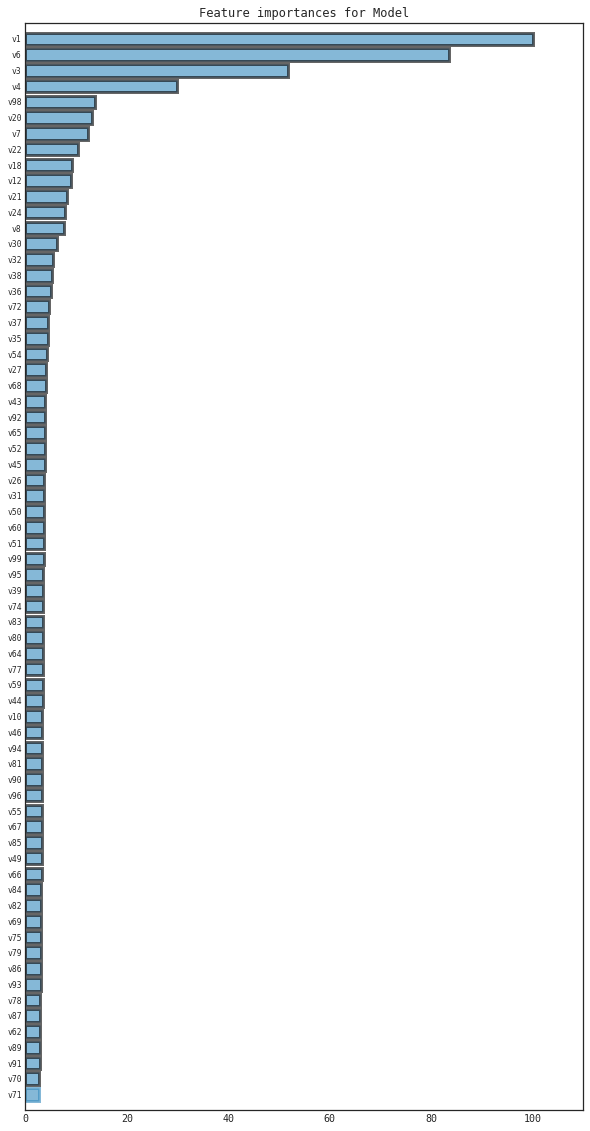

In [11]:
feat_imp_sort_df = feat_imp.feat_imp_xval_plot(feature_importances)

### Univariate

SelectKBest, SelectPercentile... take as input a scoring function that returns univariate scores and p-values <br>

For classification: chi2, f_classif, mutual_info_classif <br>
<b>Chi2</b> :  test chi-squared statistic from X (contain only non-negative features such as booleans or frequencies) relative to the classes <br>
<b>f_classif</b> : Compute the ANOVA F-value for the provided sample (F-test estimate the degree of linear dependency between two random variables) <br>
<b>mutual_info_classif</b> : Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables (0 independent, higher high correlation). Can capture any kind of statistical dependency, but being nonparametric, they require more samples for accurate estimation


#### F-Value

In [12]:
sel = SelectPercentile(f_classif, percentile=30)
np_sel = sel.fit_transform(df_features, df_target)

labels = [df_features.columns[x] for x in sel.get_support(indices=True)]
df_sel = pd.DataFrame(np_sel, columns=labels)
print "Number of Initial Features {}".format(len(feature_columns))
print "Number of Selected Features {}".format(len(labels))

Number of Initial Features 99
Number of Selected Features 30


In [13]:
print 'Removed features {}'.format([x for x in feature_columns if x not in df_sel.columns.values])

Removed features ['v4', 'v8', 'v9', 'v11', 'v15', 'v18', 'v21', 'v22', 'v24', 'v27', 'v28', 'v30', 'v31', 'v32', 'v34', 'v35', 'v36', 'v37', 'v38', 'v39', 'v40', 'v41', 'v42', 'v43', 'v44', 'v45', 'v49', 'v50', 'v51', 'v52', 'v53', 'v54', 'v55', 'v56', 'v58', 'v59', 'v61', 'v62', 'v63', 'v64', 'v65', 'v66', 'v67', 'v68', 'v69', 'v70', 'v71', 'v72', 'v74', 'v75', 'v76', 'v77', 'v78', 'v79', 'v80', 'v81', 'v82', 'v83', 'v86', 'v87', 'v88', 'v89', 'v90', 'v91', 'v92', 'v93', 'v95', 'v96', 'v99']


In [14]:
# Add ID and Target after feature selection
df_sel = pd.concat([df[[ID,TARGET]], df_sel], axis=1)
sel_feature_id_columns = [x for x in df_sel.columns if x != TARGET]

#### Xval after feature selection

modeling started
shuffle: 0, AUC: 0.767947, lift at 10 percent: 2.722474
shuffle: 1, AUC: 0.761666, lift at 10 percent: 2.668666
shuffle: 2, AUC: 0.771403, lift at 10 percent: 2.646628
shuffle: 3, AUC: 0.775463, lift at 10 percent: 2.697785
shuffle: 4, AUC: 0.760745, lift at 10 percent: 2.566691


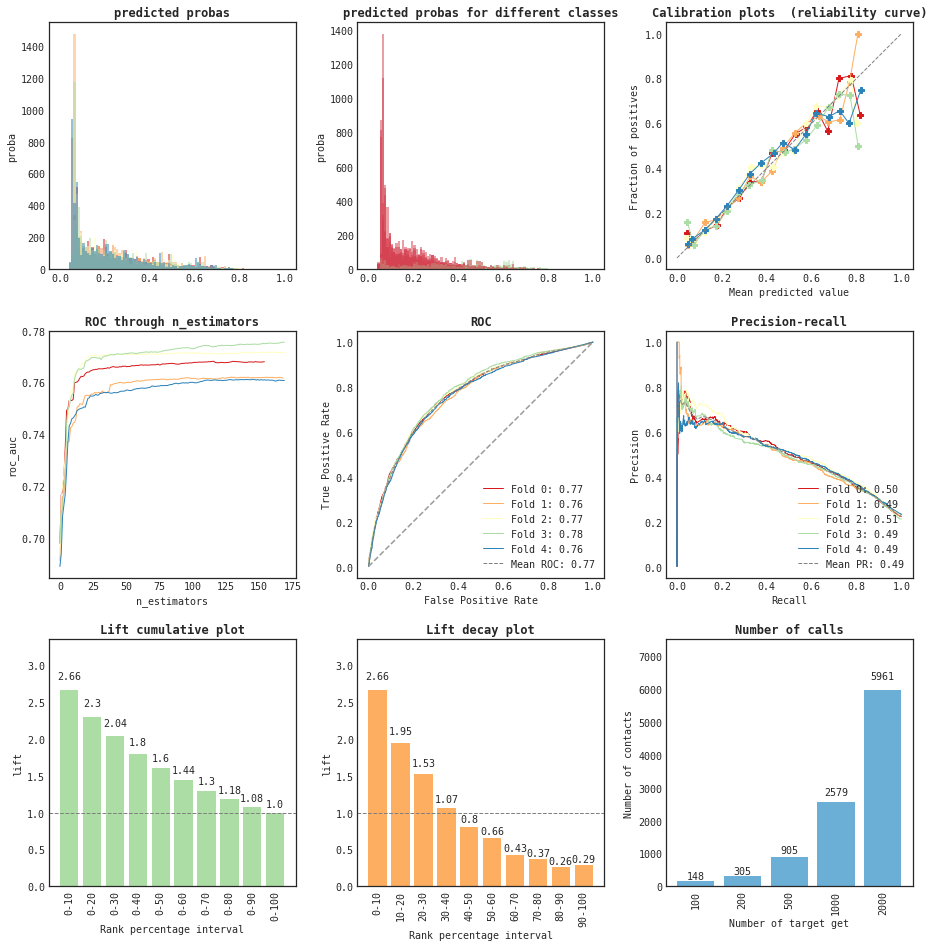

In [15]:
classifier = xgb.XGBClassifier(objective='binary:logistic',max_depth=6, n_estimators=170, learning_rate=0.05, max_delta_step=1,
                               min_child_weight=25, gamma=0.1, scale_pos_weight=1, colsample_bytree=0.85, subsample=0.85, 
                               colsample_bylevel=0.85, nthread=4, seed=27, silent=1)

results_cv_targeting, feature_importances, nb_calls_cv = xval.run_cross_validation_xgb(df_sel, classifier, sel_feature_id_columns,
                                                                                       ID, TARGET, PRED_PROBA, 5, .3, 0, False, 
                                                                                       40)

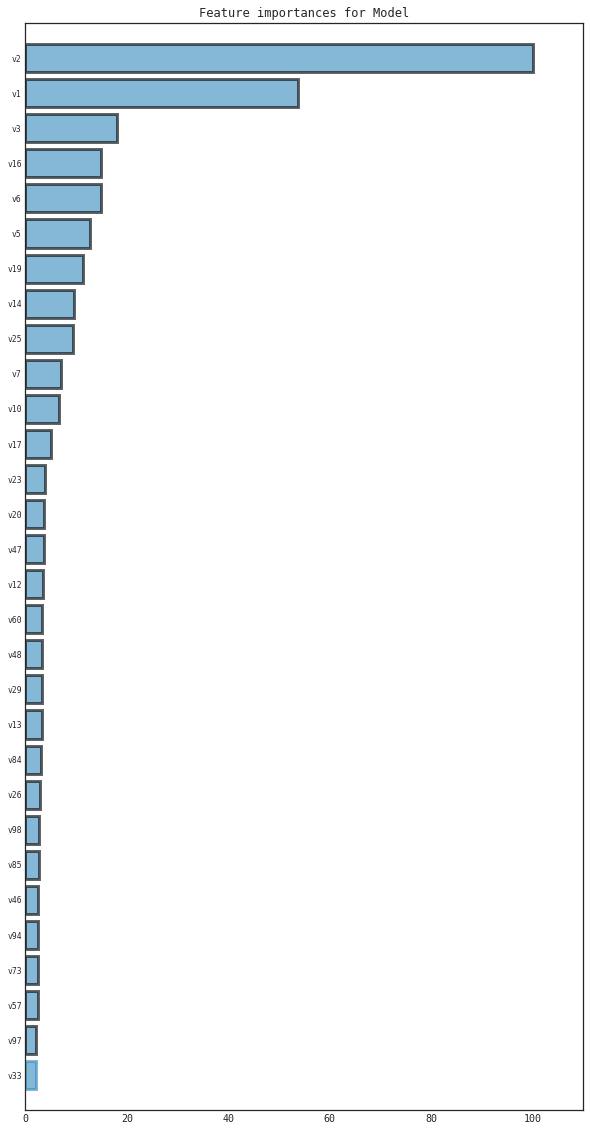

In [16]:
feat_imp_sort_df = feat_imp.feat_imp_xval_plot(feature_importances)

#### Mutual info (The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances)

In [17]:
sel = SelectPercentile(mutual_info_classif, percentile=30)
np_sel = sel.fit_transform(df_features, df_target)

labels = [df_features.columns[x] for x in sel.get_support(indices=True)]
df_sel = pd.DataFrame(np_sel, columns=labels)
print "Number of Initial Features {}".format(len(feature_columns))
print "Number of Selected Features {}".format(len(labels))

print 'Removed features {}'.format([x for x in feature_columns if x not in df_sel.columns.values])

Number of Initial Features 99
Number of Selected Features 30
Removed features ['v5', 'v9', 'v11', 'v12', 'v13', 'v14', 'v15', 'v17', 'v19', 'v21', 'v23', 'v24', 'v25', 'v27', 'v28', 'v29', 'v32', 'v34', 'v37', 'v38', 'v40', 'v41', 'v42', 'v44', 'v45', 'v47', 'v48', 'v49', 'v50', 'v52', 'v53', 'v54', 'v55', 'v56', 'v57', 'v58', 'v59', 'v61', 'v62', 'v63', 'v64', 'v65', 'v66', 'v67', 'v68', 'v69', 'v70', 'v71', 'v72', 'v73', 'v74', 'v75', 'v76', 'v79', 'v81', 'v82', 'v83', 'v84', 'v86', 'v87', 'v88', 'v89', 'v90', 'v91', 'v93', 'v95', 'v96', 'v97', 'v98']


In [18]:
# Add ID and Target after feature selection
df_sel = pd.concat([df[[ID,TARGET]], df_sel], axis=1)
sel_feature_id_columns = [x for x in df_sel.columns if x != TARGET]

#### Xval after feature selection

modeling started
shuffle: 0, AUC: 0.780474, lift at 10 percent: 2.914157
shuffle: 1, AUC: 0.771167, lift at 10 percent: 2.794562
shuffle: 2, AUC: 0.776101, lift at 10 percent: 2.704918
shuffle: 3, AUC: 0.788678, lift at 10 percent: 2.926094
shuffle: 4, AUC: 0.772816, lift at 10 percent: 2.806622


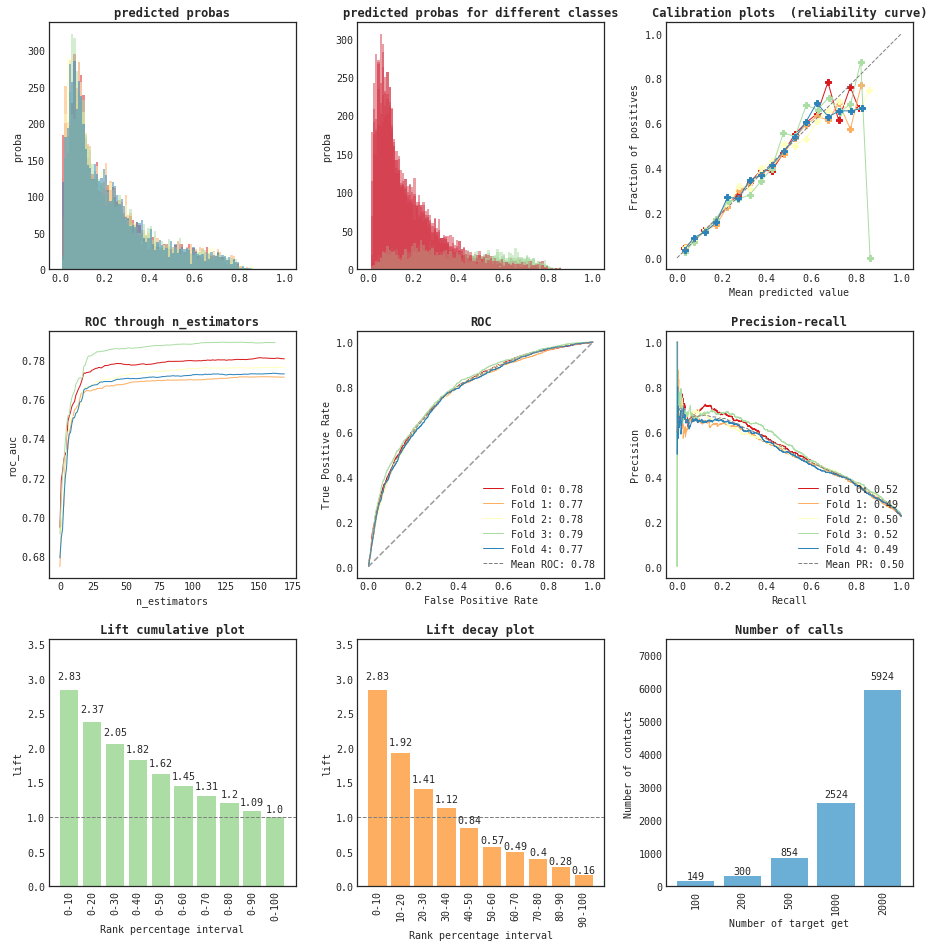

In [19]:
classifier = xgb.XGBClassifier(objective='binary:logistic',max_depth=6, n_estimators=170, learning_rate=0.05, max_delta_step=1,
                               min_child_weight=25, gamma=0.1, scale_pos_weight=1, colsample_bytree=0.85, subsample=0.85, 
                               colsample_bylevel=0.85, nthread=4, seed=27, silent=1)

results_cv_targeting, feature_importances, nb_calls_cv = xval.run_cross_validation_xgb(df_sel, classifier, sel_feature_id_columns,
                                                                                       ID, TARGET, PRED_PROBA, 5, .3, 0, False, 
                                                                                       40)

### Select from model

model with thresholds (absolute values or relative)

#### Using linear models

Linear models penalized with the L1 norm have sparse solutions <br>
Sparse estimators useful for this purpose are Lasso for regression, and of LogisticRegression and LinearSVC for classification

#### Linear SVC (SVM with linear kernel)

In [35]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False)
lsvc = lsvc.fit(df_features, df_target)
sel = SelectFromModel(lsvc, prefit=True, threshold=1e-5)
np_sel = sel.transform(df_features)

In [36]:
labels = [df_features.columns[x] for x in sel.get_support(indices=True)]
df_sel = pd.DataFrame(np_sel, columns=labels)
print "Number of Initial Features {}".format(len(feature_columns))
print "Number of Selected Features {}".format(len(labels))
print 'Removed features {}'.format([x for x in feature_columns if x not in df_sel.columns.values])

Number of Initial Features 99
Number of Selected Features 38
Removed features ['v2', 'v4', 'v8', 'v14', 'v16', 'v17', 'v18', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v29', 'v30', 'v31', 'v32', 'v34', 'v35', 'v37', 'v39', 'v40', 'v42', 'v43', 'v44', 'v45', 'v47', 'v49', 'v51', 'v53', 'v54', 'v56', 'v57', 'v59', 'v61', 'v62', 'v64', 'v67', 'v69', 'v70', 'v72', 'v73', 'v74', 'v75', 'v76', 'v77', 'v78', 'v82', 'v83', 'v85', 'v87', 'v89', 'v90', 'v91', 'v92', 'v93', 'v94', 'v95', 'v96', 'v98', 'v99']


In [37]:
# Add ID and Target after feature selection
df_sel = pd.concat([df[[ID,TARGET]], df_sel], axis=1)
sel_feature_id_columns = [x for x in df_sel.columns if x != TARGET]

modeling started
shuffle: 0, AUC: 0.793648, lift at 10 percent: 2.913955
shuffle: 1, AUC: 0.786114, lift at 10 percent: 2.826725
shuffle: 2, AUC: 0.799346, lift at 10 percent: 2.857143
shuffle: 3, AUC: 0.775416, lift at 10 percent: 2.830882
shuffle: 4, AUC: 0.785708, lift at 10 percent: 2.944401


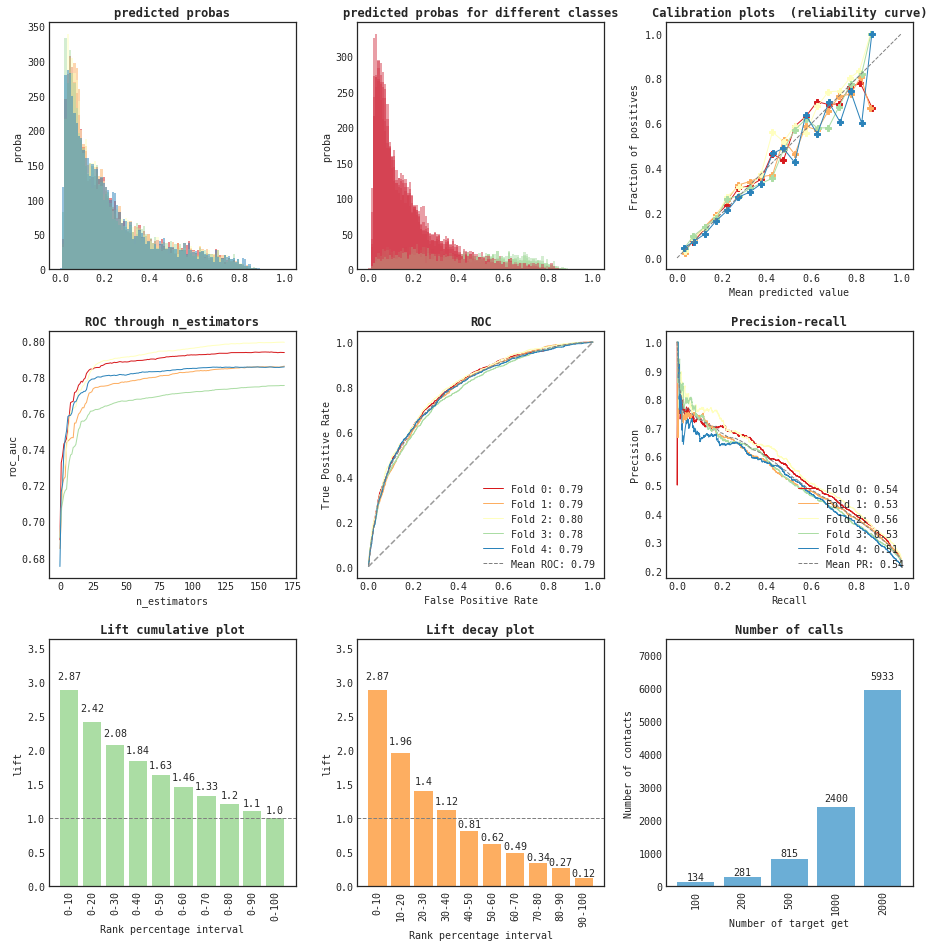

In [38]:
classifier = xgb.XGBClassifier(objective='binary:logistic',max_depth=6, n_estimators=170, learning_rate=0.05, max_delta_step=1,
                               min_child_weight=25, gamma=0.1, scale_pos_weight=1, colsample_bytree=0.85, subsample=0.85, 
                               colsample_bylevel=0.85, nthread=4, seed=27, silent=1)

results_cv_targeting, feature_importances, nb_calls_cv = xval.run_cross_validation_xgb(df_sel, classifier, sel_feature_id_columns,
                                                                                       ID, TARGET, PRED_PROBA, 5, .3, 0, False, 
                                                                                       40)

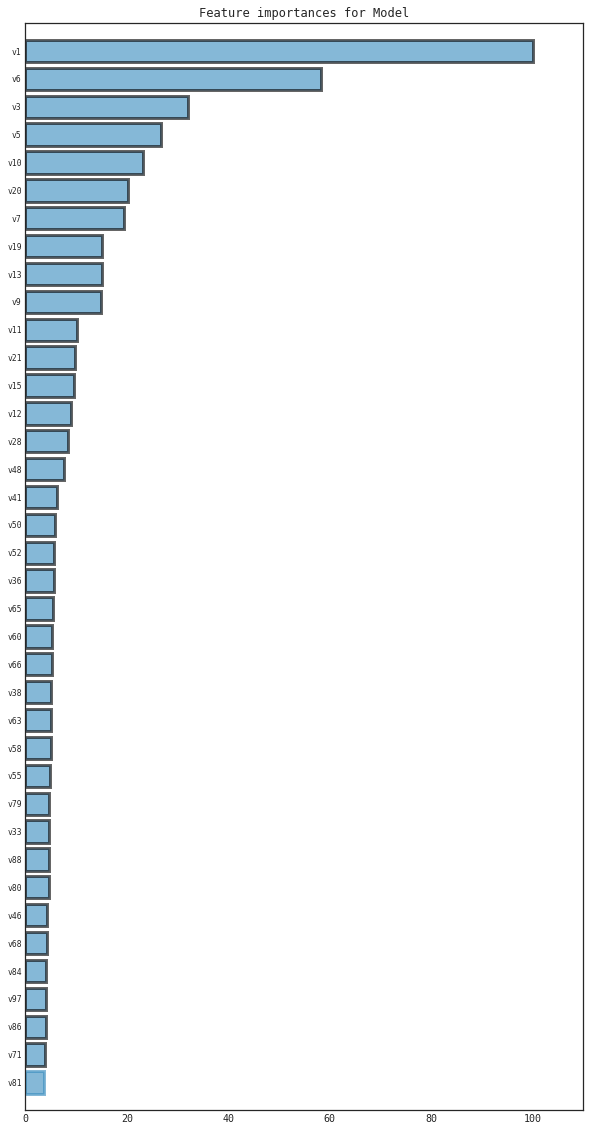

In [39]:
feat_imp_sort_df = feat_imp.feat_imp_xval_plot(feature_importances)

#### Logistic regression

In [40]:
lg = LogisticRegression(C=0.01, penalty="l1")
lg = lg.fit(df_features, df_target)
sel = SelectFromModel(lsvc, prefit=True, threshold=1e-5)
np_sel = sel.transform(df_features)

In [41]:
labels = [df_features.columns[x] for x in sel.get_support(indices=True)]
df_sel = pd.DataFrame(np_sel, columns=labels)
print "Number of Initial Features {}".format(len(feature_columns))
print "Number of Selected Features {}".format(len(labels))
print 'Removed features {}'.format([x for x in feature_columns if x not in df_sel.columns.values])

Number of Initial Features 99
Number of Selected Features 35
Removed features ['v2', 'v4', 'v5', 'v6', 'v8', 'v9', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v22', 'v23', 'v25', 'v26', 'v27', 'v29', 'v30', 'v31', 'v32', 'v33', 'v34', 'v35', 'v37', 'v39', 'v40', 'v41', 'v42', 'v43', 'v44', 'v45', 'v47', 'v48', 'v49', 'v51', 'v53', 'v54', 'v55', 'v56', 'v57', 'v58', 'v59', 'v61', 'v62', 'v64', 'v69', 'v70', 'v72', 'v73', 'v74', 'v75', 'v76', 'v78', 'v83', 'v85', 'v89', 'v90', 'v91', 'v92', 'v93', 'v94', 'v96', 'v98']


In [42]:
# Add ID and Target after feature selection
df_sel = pd.concat([df[[ID,TARGET]], df_sel], axis=1)
sel_feature_id_columns = [x for x in df_sel.columns if x != TARGET]

modeling started
shuffle: 0, AUC: 0.790163, lift at 10 percent: 2.872648
shuffle: 1, AUC: 0.789232, lift at 10 percent: 2.954375
shuffle: 2, AUC: 0.795142, lift at 10 percent: 3.014105
shuffle: 3, AUC: 0.796114, lift at 10 percent: 3.043149
shuffle: 4, AUC: 0.783966, lift at 10 percent: 2.862509


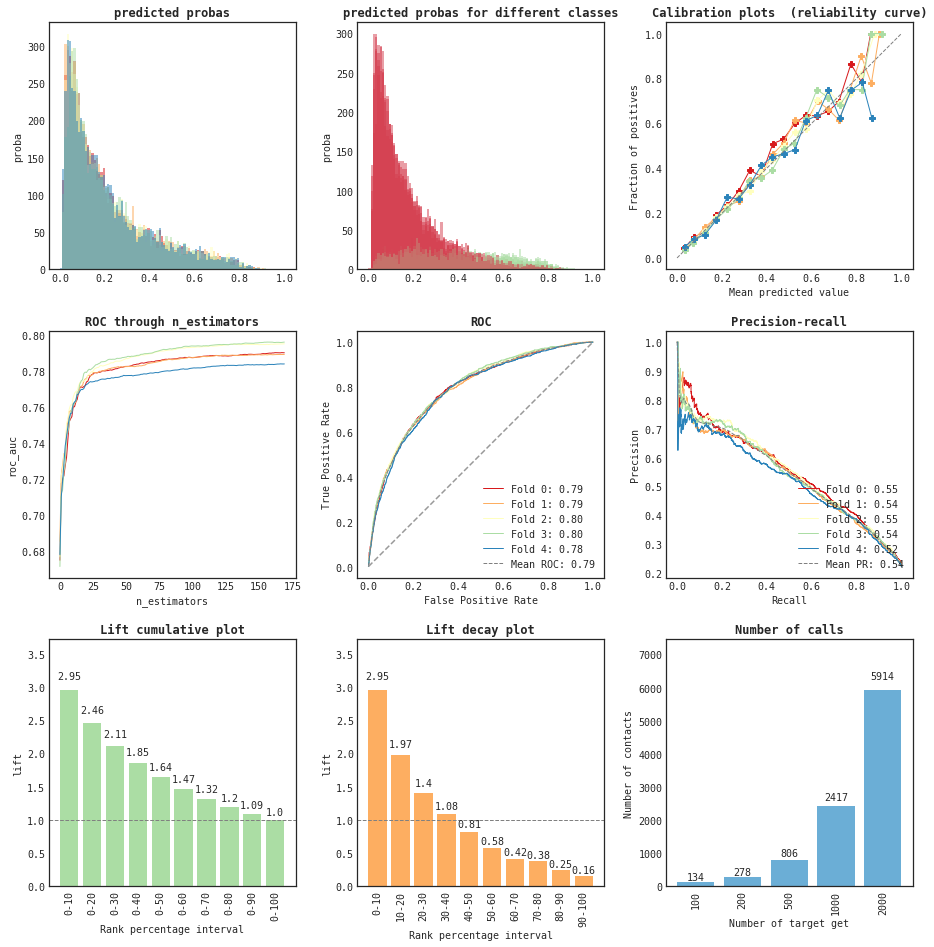

In [43]:
classifier = xgb.XGBClassifier(objective='binary:logistic',max_depth=6, n_estimators=170, learning_rate=0.05, max_delta_step=1,
                               min_child_weight=25, gamma=0.1, scale_pos_weight=1, colsample_bytree=0.85, subsample=0.85, 
                               colsample_bylevel=0.85, nthread=4, seed=27, silent=1)

results_cv_targeting, feature_importances, nb_calls_cv = xval.run_cross_validation_xgb(df_sel, classifier, sel_feature_id_columns,
                                                                                       ID, TARGET, PRED_PROBA, 5, .3, 0, False, 
                                                                                       40)

#### Using tree-based models

#### Random Forest

In [53]:
clf = RandomForestClassifier(n_estimators=100, min_samples_split=30, min_samples_leaf=10,n_jobs=4)
clf = clf.fit(df_features, df_target)
sel = SelectFromModel(clf, prefit=True,threshold='mean')
np_sel = sel.transform(df_features)

In [54]:
labels = [df_features.columns[x] for x in sel.get_support(indices=True)]
df_sel = pd.DataFrame(np_sel, columns=labels)
print "Number of Initial Features {}".format(len(feature_columns))
print "Number of Selected Features {}".format(len(labels))
print 'Removed features {}'.format([x for x in feature_columns if x not in df_sel.columns.values])

Number of Initial Features 99
Number of Selected Features 41
Removed features ['v2', 'v5', 'v9', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v19', 'v21', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v33', 'v34', 'v40', 'v41', 'v42', 'v44', 'v46', 'v47', 'v48', 'v49', 'v50', 'v52', 'v53', 'v55', 'v56', 'v57', 'v58', 'v59', 'v60', 'v61', 'v62', 'v63', 'v65', 'v66', 'v73', 'v74', 'v75', 'v76', 'v79', 'v81', 'v83', 'v84', 'v85', 'v86', 'v88', 'v94', 'v96', 'v97', 'v98']


In [55]:
# Add ID and Target after feature selection
df_sel = pd.concat([df[[ID,TARGET]], df_sel], axis=1)
sel_feature_id_columns = [x for x in df_sel.columns if x != TARGET]

modeling started
shuffle: 0, AUC: 0.792740, lift at 10 percent: 2.990008
shuffle: 1, AUC: 0.796795, lift at 10 percent: 3.044152
shuffle: 2, AUC: 0.784814, lift at 10 percent: 2.988077
shuffle: 3, AUC: 0.794747, lift at 10 percent: 2.970219
shuffle: 4, AUC: 0.779781, lift at 10 percent: 3.010085


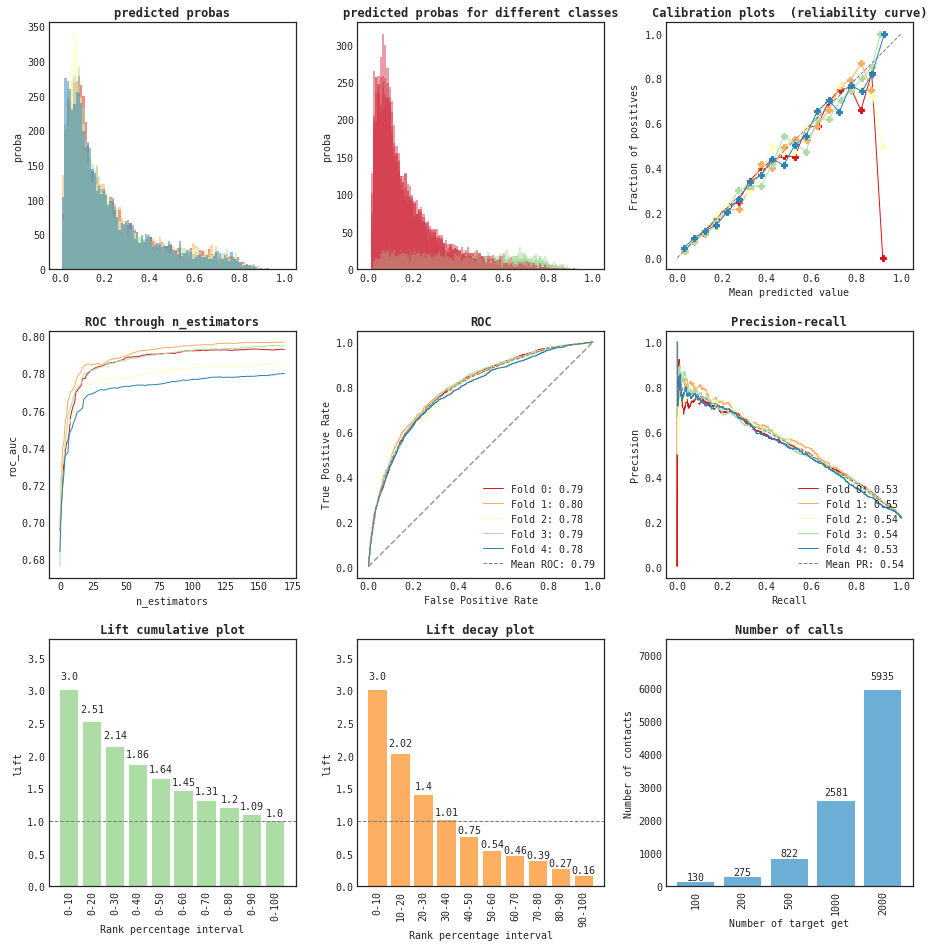

In [56]:
classifier = xgb.XGBClassifier(objective='binary:logistic',max_depth=6, n_estimators=170, learning_rate=0.05, max_delta_step=1,
                               min_child_weight=25, gamma=0.1, scale_pos_weight=1, colsample_bytree=0.85, subsample=0.85, 
                               colsample_bylevel=0.85, nthread=4, seed=27, silent=1)

results_cv_targeting, feature_importances, nb_calls_cv = xval.run_cross_validation_xgb(df_sel, classifier, sel_feature_id_columns,
                                                                                       ID, TARGET, PRED_PROBA, 5, .3, 0, False, 
                                                                                       40)

#### xgboost

In [61]:
clf = xgb.XGBClassifier(objective='binary:logistic',max_depth=6, n_estimators=80, learning_rate=0.05, max_delta_step=1,
                               min_child_weight=25, gamma=0.1, scale_pos_weight=1, colsample_bytree=0.85, subsample=0.85, 
                               colsample_bylevel=0.85, nthread=4, seed=27, silent=1)
clf = clf.fit(df_features, df_target)
sel = SelectFromModel(clf, prefit=True,threshold='1.2*mean')
np_sel = sel.transform(df_features)

In [62]:
labels = [df_features.columns[x] for x in sel.get_support(indices=True)]
df_sel = pd.DataFrame(np_sel, columns=labels)
print "Number of Initial Features {}".format(len(feature_columns))
print "Number of Selected Features {}".format(len(labels))
print 'Removed features {}'.format([x for x in feature_columns if x not in df_sel.columns.values])

Number of Initial Features 99
Number of Selected Features 35
Removed features ['v1', 'v2', 'v3', 'v5', 'v6', 'v7', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v19', 'v20', 'v21', 'v23', 'v24', 'v25', 'v26', 'v28', 'v29', 'v31', 'v33', 'v34', 'v39', 'v40', 'v42', 'v44', 'v46', 'v47', 'v48', 'v49', 'v52', 'v53', 'v56', 'v57', 'v58', 'v59', 'v60', 'v61', 'v62', 'v63', 'v65', 'v66', 'v70', 'v73', 'v74', 'v75', 'v76', 'v79', 'v81', 'v83', 'v84', 'v85', 'v86', 'v88', 'v89', 'v94', 'v96', 'v97', 'v98']


In [63]:
# Add ID and Target after feature selection
df_sel = pd.concat([df[[ID,TARGET]], df_sel], axis=1)
sel_feature_id_columns = [x for x in df_sel.columns if x != TARGET]

modeling started
shuffle: 0, AUC: 0.801597, lift at 10 percent: 3.085938
shuffle: 1, AUC: 0.790308, lift at 10 percent: 3.107256
shuffle: 2, AUC: 0.787828, lift at 10 percent: 2.922724
shuffle: 3, AUC: 0.797864, lift at 10 percent: 3.113772
shuffle: 4, AUC: 0.801190, lift at 10 percent: 3.075205


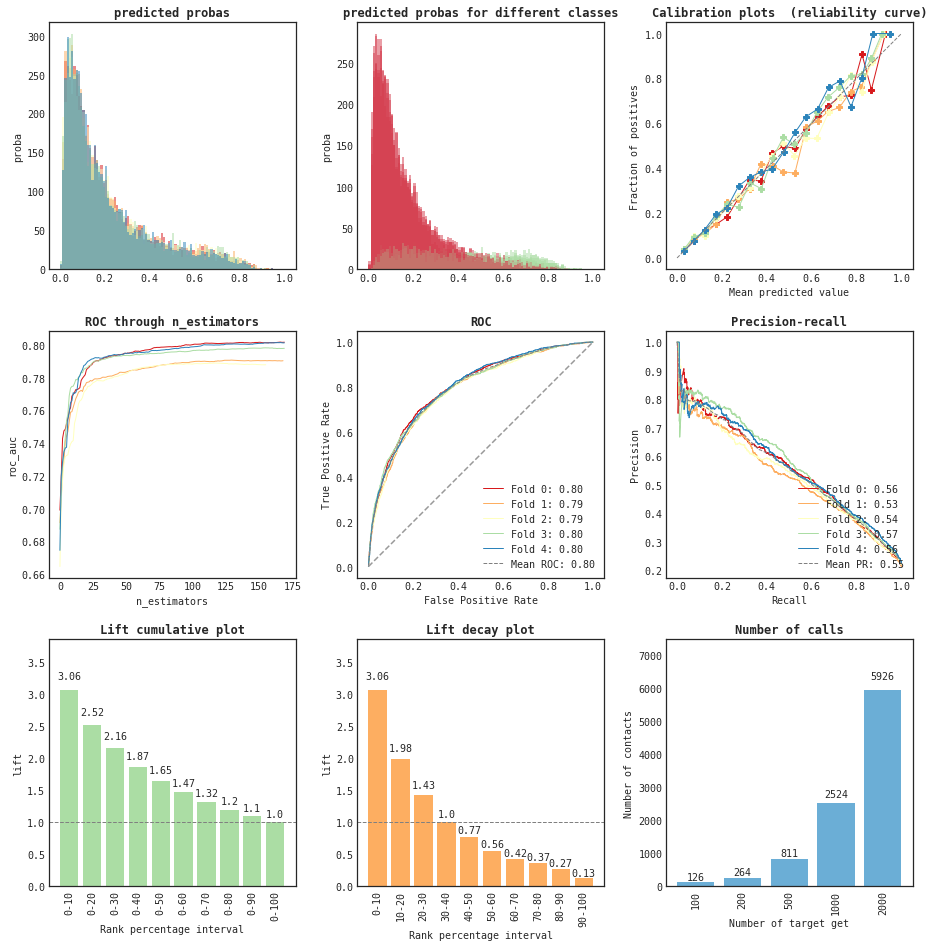

In [64]:
classifier = xgb.XGBClassifier(objective='binary:logistic',max_depth=6, n_estimators=170, learning_rate=0.05, max_delta_step=1,
                               min_child_weight=25, gamma=0.1, scale_pos_weight=1, colsample_bytree=0.85, subsample=0.85, 
                               colsample_bylevel=0.85, nthread=4, seed=27, silent=1)

results_cv_targeting, feature_importances, nb_calls_cv = xval.run_cross_validation_xgb(df_sel, classifier, sel_feature_id_columns,
                                                                                       ID, TARGET, PRED_PROBA, 5, .3, 0, False, 
                                                                                       40)

### RFE

#### For linear models

In [92]:
lg = LogisticRegression(C=0.01, penalty="l1")
lg_cv =  RFECV(estimator=lg, step=9, cv=StratifiedKFold(2),scoring='roc_auc')
lg_cv.fit(df_features, df_target)

RFECV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
   estimator=LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
   n_jobs=1, scoring='roc_auc', step=9, verbose=0)

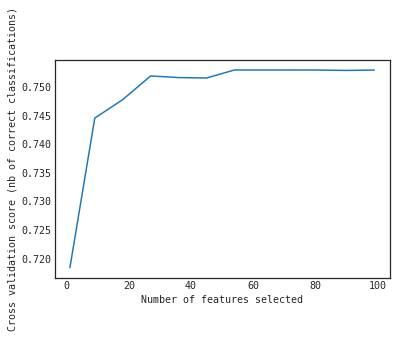

Optimal number of features : 63


In [112]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
#plt.plot(range(1, len(lg_cv.support_)+10,10), lg_cv.grid_scores_)
plt.plot([1, 9, 18, 27, 36, 45, 54, 63, 72, 81, 90, 99], lg_cv.grid_scores_)
plt.show()
print "Optimal number of features : {}".format(lg_cv.n_features_)

In [138]:
labels = [df_features.columns[x] for x in lg_cv.get_support(indices=True)]
df_sel = df[labels]
print "Number of Initial Features {}".format(len(feature_columns))
print "Number of Selected Features {}".format(len(labels))
print 'Removed features {}'.format([x for x in feature_columns if x not in df_sel.columns.values])

Number of Initial Features 99
Number of Selected Features 63
Removed features ['v2', 'v5', 'v6', 'v9', 'v13', 'v14', 'v15', 'v16', 'v17', 'v23', 'v25', 'v26', 'v29', 'v33', 'v34', 'v37', 'v39', 'v40', 'v41', 'v42', 'v47', 'v48', 'v53', 'v55', 'v56', 'v57', 'v58', 'v61', 'v73', 'v74', 'v76', 'v85', 'v90', 'v94', 'v96', 'v98']


In [139]:
# Add ID and Target after feature selection
df_sel = pd.concat([df[[ID,TARGET]], df_sel], axis=1)
sel_feature_id_columns = [x for x in df_sel.columns if x != TARGET]

modeling started
shuffle: 0, AUC: 0.791961, lift at 10 percent: 3.022901
shuffle: 1, AUC: 0.798074, lift at 10 percent: 3.003096
shuffle: 2, AUC: 0.799668, lift at 10 percent: 2.871646
shuffle: 3, AUC: 0.809882, lift at 10 percent: 3.044822
shuffle: 4, AUC: 0.807510, lift at 10 percent: 3.057722


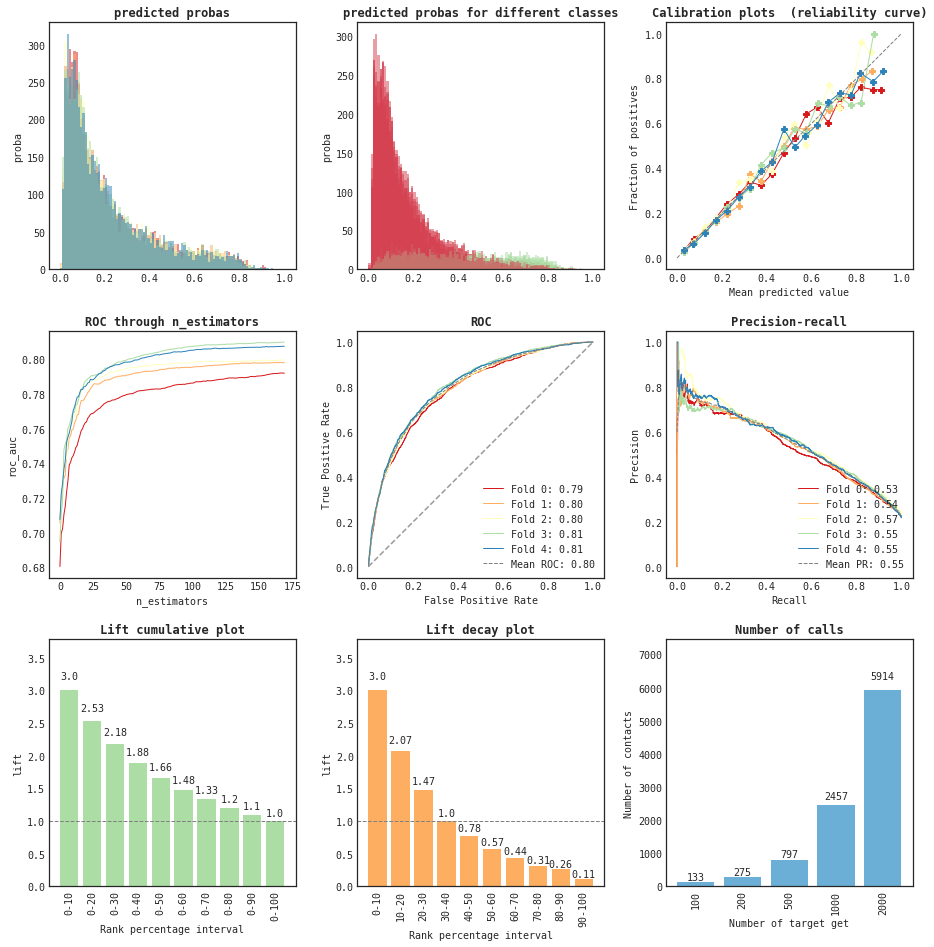

In [115]:
classifier = xgb.XGBClassifier(objective='binary:logistic',max_depth=6, n_estimators=170, learning_rate=0.05, max_delta_step=1,
                               min_child_weight=25, gamma=0.1, scale_pos_weight=1, colsample_bytree=0.85, subsample=0.85, 
                               colsample_bylevel=0.85, nthread=4, seed=27, silent=1)

results_cv_targeting, feature_importances, nb_calls_cv = xval.run_cross_validation_xgb(df_sel, classifier, sel_feature_id_columns,
                                                                                       ID, TARGET, PRED_PROBA, 5, .3, 0, False, 
                                                                                       40)

#### for tree based models

Random Forest

In [127]:
rf = RandomForestClassifier(n_estimators=120, min_samples_split=30, min_samples_leaf=10, n_jobs=4, max_features=0.5)
rf_cv =  RFECV(estimator=rf, step=9, cv=StratifiedKFold(2),scoring='roc_auc')
rf_cv.fit(df_features, df_target)

RFECV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
   estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=30,
            min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=4,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
   n_jobs=1, scoring='roc_auc', step=9, verbose=0)

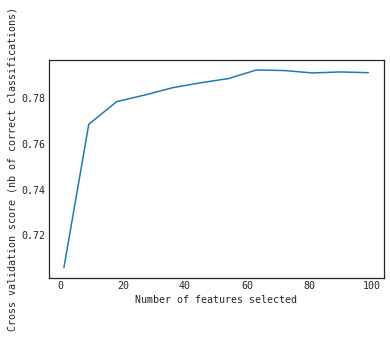

Optimal number of features : 63


In [128]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
#plt.plot(range(1, len(lg_cv.support_)+10,10), lg_cv.grid_scores_)
plt.plot([1, 9, 18, 27, 36, 45, 54, 63, 72, 81, 90, 99], rf_cv.grid_scores_)
plt.show()
print "Optimal number of features : {}".format(rf_cv.n_features_)

In [129]:
labels = [df_features.columns[x] for x in lg_cv.get_support(indices=True)]
df_sel = df[labels]
print "Number of Initial Features {}".format(len(feature_columns))
print "Number of Selected Features {}".format(len(labels))
print 'Removed features {}'.format([x for x in feature_columns if x not in df_sel.columns.values])

Number of Initial Features 99
Number of Selected Features 63
Removed features ['v2', 'v5', 'v6', 'v9', 'v13', 'v14', 'v15', 'v16', 'v17', 'v23', 'v25', 'v26', 'v29', 'v33', 'v34', 'v37', 'v39', 'v40', 'v41', 'v42', 'v47', 'v48', 'v53', 'v55', 'v56', 'v57', 'v58', 'v61', 'v73', 'v74', 'v76', 'v85', 'v90', 'v94', 'v96', 'v98']


In [130]:
# Add ID and Target after feature selection
df_sel = pd.concat([df[[ID,TARGET]], df_sel], axis=1)
sel_feature_id_columns = [x for x in df_sel.columns if x != TARGET]

modeling started
shuffle: 0, AUC: 0.798020, lift at 10 percent: 3.055988
shuffle: 1, AUC: 0.801324, lift at 10 percent: 3.057034
shuffle: 2, AUC: 0.799036, lift at 10 percent: 3.026521
shuffle: 3, AUC: 0.804529, lift at 10 percent: 3.009709
shuffle: 4, AUC: 0.803125, lift at 10 percent: 3.112990


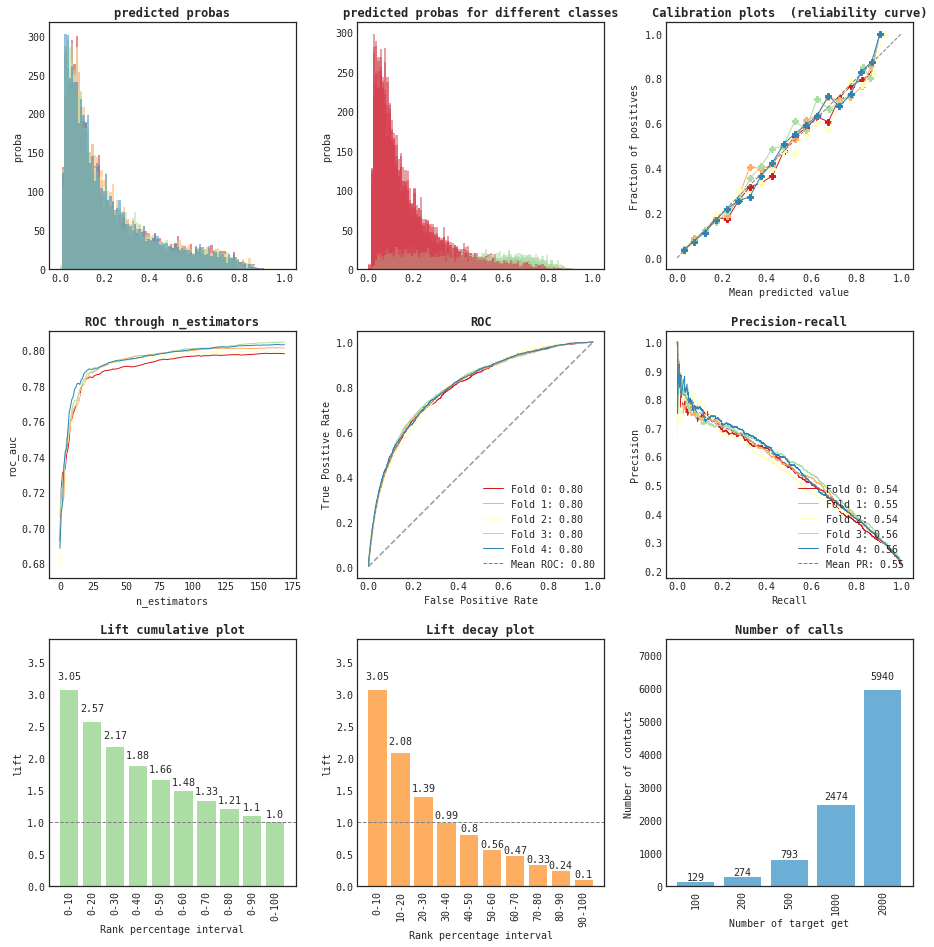

In [131]:
classifier = xgb.XGBClassifier(objective='binary:logistic',max_depth=6, n_estimators=170, learning_rate=0.05, max_delta_step=1,
                               min_child_weight=25, gamma=0.1, scale_pos_weight=1, colsample_bytree=0.85, subsample=0.85, 
                               colsample_bylevel=0.85, nthread=4, seed=27, silent=1)

results_cv_targeting, feature_importances, nb_calls_cv = xval.run_cross_validation_xgb(df_sel, classifier, sel_feature_id_columns,
                                                                                       ID, TARGET, PRED_PROBA, 5, .3, 0, False, 
                                                                                       40)

Xgboost

In [119]:
clf = xgb.XGBClassifier(objective='binary:logistic',max_depth=6, n_estimators=80, learning_rate=0.05, max_delta_step=1,
                               min_child_weight=25, gamma=0.1, scale_pos_weight=1, colsample_bytree=1, subsample=0.85, 
                               colsample_bylevel=1, nthread=4, seed=27, silent=1)
clf_cv =  RFECV(estimator=clf, step=9, cv=StratifiedKFold(3),scoring='roc_auc')
clf_cv.fit(df_features, df_target)

RFECV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
   estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0.1, learning_rate=0.05, max_delta_step=1, max_depth=6,
       min_child_weight=25, missing=None, n_estimators=80, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=1, subsample=0.85),
   n_jobs=1, scoring='roc_auc', step=9, verbose=0)

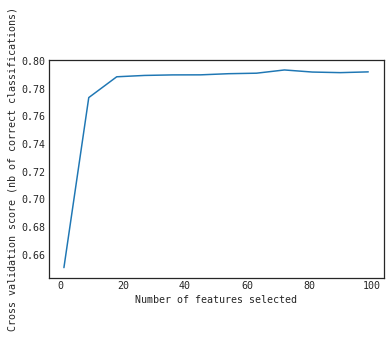

Optimal number of features : 72


In [121]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
#plt.plot(range(1, len(lg_cv.support_)+10,10), lg_cv.grid_scores_)
plt.plot([1, 9, 18, 27, 36, 45, 54, 63, 72, 81, 90, 99], clf_cv.grid_scores_)
plt.show()
print "Optimal number of features : {}".format(clf_cv.n_features_)

In [124]:
labels = [df_features.columns[x] for x in lg_cv.get_support(indices=True)]
df_sel = df[labels]
print "Number of Initial Features {}".format(len(feature_columns))
print "Number of Selected Features {}".format(len(labels))
print 'Removed features {}'.format([x for x in feature_columns if x not in df_sel.columns.values])

Number of Initial Features 99
Number of Selected Features 63
Removed features ['v2', 'v5', 'v6', 'v9', 'v13', 'v14', 'v15', 'v16', 'v17', 'v23', 'v25', 'v26', 'v29', 'v33', 'v34', 'v37', 'v39', 'v40', 'v41', 'v42', 'v47', 'v48', 'v53', 'v55', 'v56', 'v57', 'v58', 'v61', 'v73', 'v74', 'v76', 'v85', 'v90', 'v94', 'v96', 'v98']


In [125]:
# Add ID and Target after feature selection
df_sel = pd.concat([df[[ID,TARGET]], df_sel], axis=1)
sel_feature_id_columns = [x for x in df_sel.columns if x != TARGET]

modeling started
shuffle: 0, AUC: 0.807021, lift at 10 percent: 3.136503
shuffle: 1, AUC: 0.800404, lift at 10 percent: 3.117693
shuffle: 2, AUC: 0.789303, lift at 10 percent: 2.942073
shuffle: 3, AUC: 0.810938, lift at 10 percent: 3.053666
shuffle: 4, AUC: 0.804183, lift at 10 percent: 3.141732


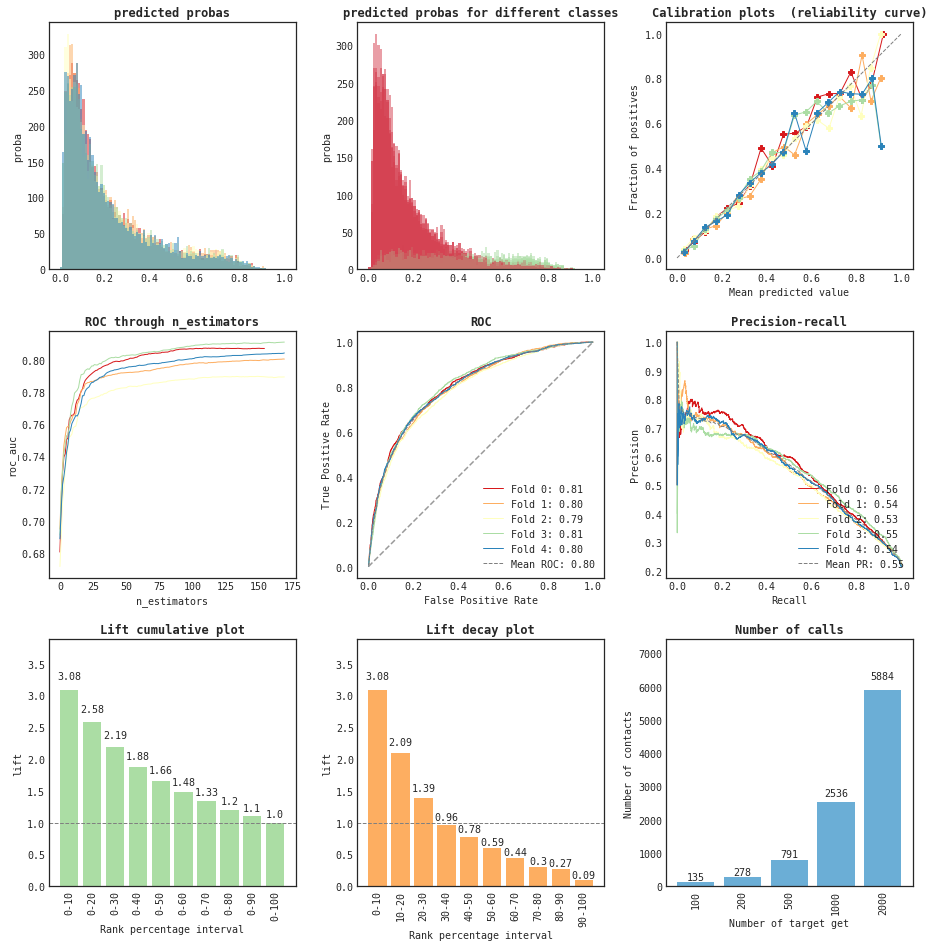

In [126]:
classifier = xgb.XGBClassifier(objective='binary:logistic',max_depth=6, n_estimators=170, learning_rate=0.05, max_delta_step=1,
                               min_child_weight=25, gamma=0.1, scale_pos_weight=1, colsample_bytree=0.85, subsample=0.85, 
                               colsample_bylevel=0.85, nthread=4, seed=27, silent=1)

results_cv_targeting, feature_importances, nb_calls_cv = xval.run_cross_validation_xgb(df_sel, classifier, sel_feature_id_columns,
                                                                                       ID, TARGET, PRED_PROBA, 5, .3, 0, False, 
                                                                                       40)

## Logistic reg with statsmodel

In [132]:
import statsmodels.api as sm

In [142]:
df_sel.drop([TARGET, ID], axis=1, inplace=True)

In [146]:
logit = sm.Logit(df[TARGET], df_sel)
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.443676
         Iterations 9


coefficients of the model, how well those coefficients fit, the overall fit
confidence interval gives an idea for how robust the coefficients of the model are

In [147]:
print result.summary()

                           Logit Regression Results                           
Dep. Variable:               m_target   No. Observations:                19898
Model:                          Logit   Df Residuals:                    19835
Method:                           MLE   Df Model:                           62
Date:                Tue, 23 Jan 2018   Pseudo R-squ.:                  0.1597
Time:                        15:59:27   Log-Likelihood:                -8828.3
converged:                       True   LL-Null:                       -10506.
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
v1            -0.2770      0.033     -8.438      0.000      -0.341      -0.213
v3            -0.0313      0.045     -0.704      0.482      -0.119       0.056
v4             0.0008      0.001      0.889      0.3

In [148]:
print result.conf_int()

                0             1
v1  -3.413559e-01 -2.126683e-01
v3  -1.186250e-01  5.595380e-02
v4  -9.461511e-04  2.517376e-03
v7  -1.986997e-01 -1.058430e-01
v8  -2.153885e-03 -1.386157e-04
v10 -1.672089e-01  8.322604e-03
v11 -4.033438e-01  7.496169e-02
v12 -2.008064e-01 -1.264475e-01
v18 -2.379399e-03  1.138039e-03
v19 -1.991592e-01 -1.147099e-01
v20 -1.374137e-01  1.181725e-02
v21 -6.493451e-02 -2.599307e-02
v22 -9.516518e-04  9.198390e-04
v24 -1.771226e-01  2.662305e-01
v27 -5.828679e-06  3.044605e-06
v28  1.141633e-01  3.133212e-01
v30 -1.724629e-03  5.944961e-04
v31 -1.135058e-03  7.347204e-04
v32  7.807559e-07  3.028010e-06
v35 -4.306122e-06  1.976051e-03
v36 -2.127701e-03  5.120701e-03
v38 -7.460113e-03  7.011039e-04
v43 -6.846480e-04  3.062454e-04
v44 -1.469295e-05 -2.781221e-06
v45 -1.660102e-05  1.549860e-05
v46  1.128424e-01  2.483023e-01
v49 -1.497994e-05  3.969625e-05
v50 -3.777189e-04  4.883121e-03
v51 -3.030471e-04  6.879209e-04
v52 -3.527281e-02  6.793433e-03
..      

odds ratio (Take the exponential of each of the coefficients) <br>
how a 1 unit increase or decrease in a variable affects the odds of target

In [149]:
print np.exp(result.params)

v1     0.758045
v3     0.969150
v4     1.000786
v7     0.858755
v8     0.998854
v10    0.923631
v11    0.848580
v12    0.849059
v18    0.999380
v19    0.854760
v20    0.939133
v21    0.955554
v22    0.999984
v24    1.045561
v27    0.999999
v28    1.238303
v30    0.999435
v31    0.999800
v32    1.000002
v35    1.000986
v36    1.001498
v38    0.996626
v43    0.999811
v44    0.999991
v45    0.999999
v46    1.197903
v49    1.000012
v50    1.002255
v51    1.000192
v52    0.985861
         ...   
v62    0.999993
v63    1.307921
v64    1.000002
v65    1.042930
v66    0.998484
v67    0.999989
v68    0.990621
v69    0.999997
v70    0.999999
v71    1.001510
v72    1.000001
v75    0.999999
v77    0.998604
v78    0.999998
v79    1.000511
v80    1.000937
v81    0.999197
v82    1.000394
v83    1.000008
v84    1.015648
v86    1.005395
v87    1.000011
v88    1.240165
v89    0.999998
v91    1.000005
v92    0.999173
v93    0.999996
v95    1.000401
v97    1.335701
v99    0.999602
Length: 63, dtype: float

using the confidence interval to get a better picture for how uncertainty in variables can impact the target

In [150]:
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print np.exp(conf)

         2.5%     97.5%        OR
v1   0.710806  0.808424  0.758045
v3   0.888141  1.057549  0.969150
v4   0.999054  1.002521  1.000786
v7   0.819796  0.899566  0.858755
v8   0.997848  0.999861  0.998854
v10  0.846023  1.008357  0.923631
v11  0.668082  1.077843  0.848580
v12  0.818071  0.881220  0.849059
v18  0.997623  1.001139  0.999380
v19  0.819419  0.891625  0.854760
v20  0.871610  1.011887  0.939133
v21  0.937129  0.974342  0.955554
v22  0.999049  1.000920  0.999984
v24  0.837677  1.305036  1.045561
v27  0.999994  1.000003  0.999999
v28  1.120935  1.367961  1.238303
v30  0.998277  1.000595  0.999435
v31  0.998866  1.000735  0.999800
v32  1.000001  1.000003  1.000002
v35  0.999996  1.001978  1.000986
v36  0.997875  1.005134  1.001498
v38  0.992568  1.000701  0.996626
v43  0.999316  1.000306  0.999811
v44  0.999985  0.999997  0.999991
v45  0.999983  1.000015  0.999999
v46  1.119455  1.281847  1.197903
v49  0.999985  1.000040  1.000012
v50  0.999622  1.004895  1.002255
v51  0.999697 

## More feature selection methods can be found at: 
https://github.com/jundongl/scikit-feature